# Overfitting Demo

In [2]:
# Library
import graphlab
import math
import random
import numpy
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
# Random value
random.seed(98103)
n = 30
x = graphlab.SArray([random.random() for i in range(n)]).sort()

In [8]:
# Compute y
y = x.apply(lambda x: math.sin(4 * x))

In [9]:
# Add random Gaussian noise to y
random.seed(1)
e = graphlab.SArray([random.gauss(0, 1.0 / 3.0) for i in range(n)])
y = y + e

In [10]:
data = graphlab.SFrame({"X1" : x, "Y" : y})
data

X1,Y
0.0395789449501,0.587050191026
0.0415680996791,0.648655851372
0.0724319480801,0.307803309485
0.150289044622,0.310748447417
0.161334144502,0.237409625496
0.191956312795,0.705017157224
0.232833917145,0.461716676992
0.259900980166,0.383260507851
0.380145814869,1.06517691429
0.432444723508,1.03184706949


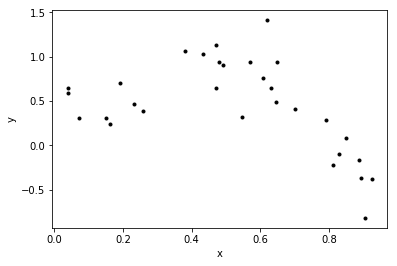

In [18]:
def plot_data(data):    
    plt.plot(data["X1"], data["Y"], "k.")
    plt.xlabel("x")
    plt.ylabel("y")

plot_data(data)

In [12]:
# Feature function
def polynomial_features(data, deg):
    data_copy = data.copy()
    for i in range(1, deg):
        data_copy["X" + str(i + 1)] = data_copy["X" + str(i)] * data_copy["X1"]
    return data_copy

In [14]:
# Print coefficients
def print_coefficients(model):    
    # Get the degree of the polynomial
    deg = len(model.coefficients["value"]) - 1

    # Get learned parameters as a list
    w = list(model.coefficients["value"])

    # Numpy has a nifty function to print out polynomials in a pretty way
    # (We'll use it, but it needs the parameters in the reverse order)
    print "Learned polynomial for degree " + str(deg) + ":"
    w.reverse()
    print numpy.poly1d(w)

In [16]:
def plot_poly_predictions(data, model):
    plot_data(data)

    # Get the degree of the polynomial
    deg = len(model.coefficients["value"]) - 1
    
    # Create 200 points in the x axis and compute the predicted value for each point
    x_pred = graphlab.SFrame({"X1" : [i / 200.0 for i in range(200)]})
    y_pred = model.predict(polynomial_features(x_pred, deg))
    
    # plot predictions
    plt.plot(x_pred["X1"], y_pred, "g-", label = "degree " + str(deg) + " fit")
    plt.legend(loc = "upper left")
    plt.axis([0, 1, -1.5, 2])

In [4]:
# Lasso regression
def polynomial_lasso_regression(data, deg, l1_penalty):
    model = graphlab.linear_regression.create(polynomial_features(data, deg), 
                                              target = "Y",
                                              l2_penalty = 0.,
                                              l1_penalty = l1_penalty,
                                              validation_set = None, 
                                              solver = "fista",
                                              verbose = False,
                                              max_iterations = 3000,
                                              convergence_threshold = 1e-10)
    return model

## Explore Lasso Solution

We refer to lambda in the lasso case below as `l1_penalty`

l1_penalty = 1.000000e-04
number of nonzeros = 17
Learned polynomial for degree 16:
       16        15         14         13         12         11
29.02 x  + 1.35 x  - 12.72 x  - 16.93 x  - 13.82 x  - 6.698 x 
          10         9         8         7         6         5
 + 1.407 x  + 8.939 x + 12.88 x + 11.44 x + 3.759 x - 8.062 x
          4         3         2
 - 16.28 x - 7.682 x + 17.86 x - 4.384 x + 0.685


l1_penalty = 1.000000e-02
number of nonzeros = 14
Learned polynomial for degree 16:
        16             15           11          10         9          8
-1.181 x  - 0.0003731 x  + 0.08711 x  + 0.7386 x  + 3.828 x + 0.4759 x
           7            6          5         4             3         2
 + 0.1281 x + 0.002859 x - 0.6152 x - 10.11 x - 0.0002888 x + 6.686 x - 1.28 x + 0.5057


l1_penalty = 1.000000e-01
number of nonzeros = 5
Learned polynomial for degree 16:
      16         6         5
2.21 x  - 1.002 x - 2.962 x + 1.216 x + 0.3473


l1_penalty = 1.000000e+01
number

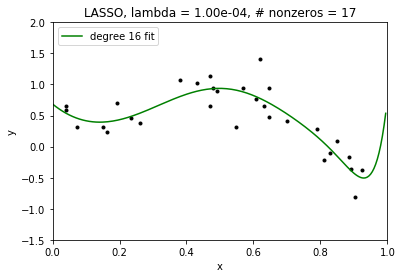

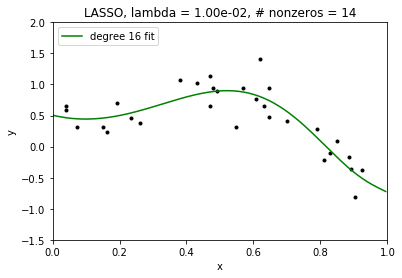

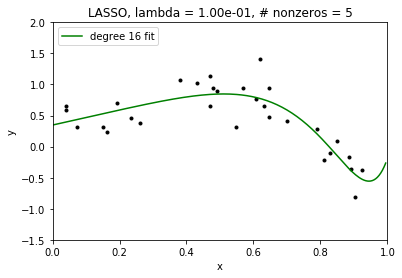

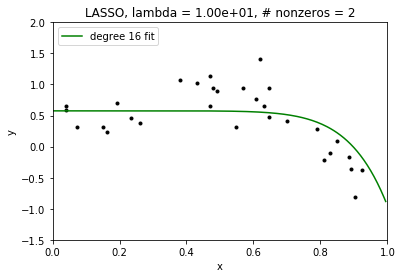

In [19]:
for l1_penalty in [0.0001, 0.01, 0.1, 10]:
    model = polynomial_lasso_regression(data, deg = 16, l1_penalty = l1_penalty)
    print "l1_penalty = %e" % l1_penalty
    print "number of nonzeros = %d" % (model.coefficients["value"]).nnz()
    print_coefficients(model)
    print "\n"
    plt.figure()
    plot_poly_predictions(data,model)
    plt.title("LASSO, lambda = %.2e, # nonzeros = %d" % (l1_penalty, (model.coefficients["value"]).nnz()))